In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

In [2]:
fm._rebuild()
plt.style.reload_library()
plt.style.use(['science', 'notebook'])
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

%config InlineBackend.figure_format = 'svg'

In [3]:
npzfile = np.load('data2.npz')
locals().update(npzfile)

In [37]:
def select_percentile(states: np.ndarray, inputs: np.ndarray, costs: np.ndarray, percentile: float) -> np.ndarray:
    cumm_costs = costs.sum(axis=0)
    percentiles = np.percentile(cumm_costs, 95, axis=0)
        
    if np.isscalar(percentiles) == 1:
        percentiles = np.array([percentiles])
    
    selected_states = []
    selected_inputs = []
    selected_costs = []
    
    
    for i, percentile in enumerate(percentiles):
        selected = cumm_costs[:, i] < percentile
        
        selected_states.append(states[:, :, selected, i])
        selected_inputs.append(inputs[:, :, selected, i])
        selected_costs.append(costs[:, selected, i])
        
    return np.stack(selected_states, axis=-1), np.stack(selected_inputs, axis=-1), np.stack(selected_costs, axis=-1)
        
        
    

In [39]:
num_inv_temps = len(inv_temps)

svmpc_states, svmpc_inputs, svmpc_costs = select_percentile(svgdc_part_states, svgdc_part_inputs, svgdc_part_costs, 95)
lqr_states, lqr_inputs, lqr_costs = select_percentile(np.stack([mp_part_states], axis=-1), np.stack([mp_part_inputs], axis=-1), np.stack([mp_part_costs], axis=-1), 95)

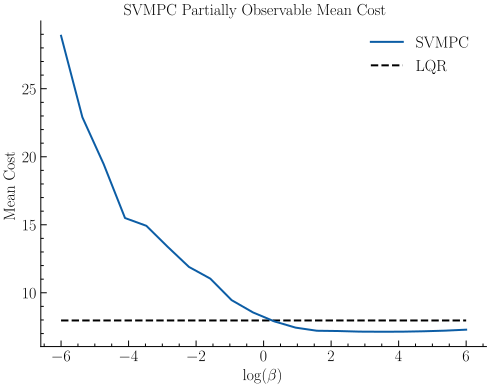

In [42]:
plt.plot(np.log(inv_temps[1:]), costs.sum(axis=0).mean(axis=0)[1:], label='SVMPC')
plt.hlines(lqr_costs.sum(axis=0).mean(), np.log(inv_temps[1]), np.log(inv_temps[-2]), linestyles='dashed', colors='k', label='LQR')


plt.title('SVMPC Partially Observable Mean Cost')
plt.xlabel(r'$\log(\beta)$')
plt.ylabel(r'Mean Cost')
plt.legend()

plt.gca().yaxis.set_ticks_position('left')
plt.gca().xaxis.set_ticks_position('bottom')
sns.despine()

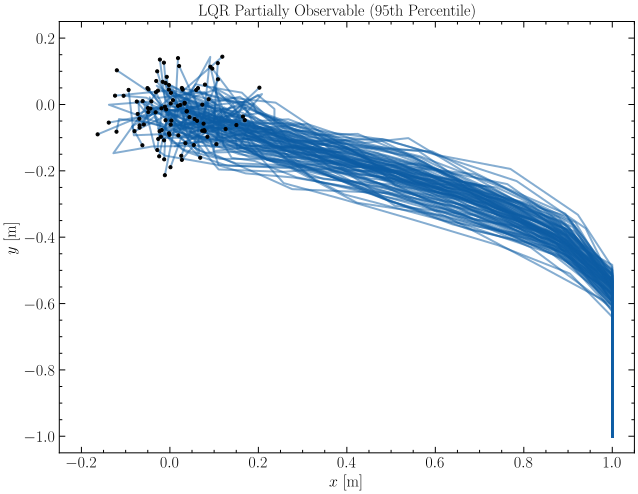

In [61]:
plt.figure()
color = next(plt.gca()._get_lines.prop_cycler)['color']
plt.plot(lqr_states[0, :, :, 0], lqr_states[1, :, :, 0], c=color, alpha=0.5)
plt.scatter(lqr_states[0, -1, :, 0], lqr_states[1, -1, :, 0], c='k', zorder=3, s=10)
plt.xlim([-0.25, 1.05])
plt.ylim([-1.05, 0.25])
plt.title('LQR Partially Observable (95th Percentile)')
plt.xlabel('$x\ [\mathrm{m}]$')
plt.ylabel('$y\ [\mathrm{m}]$')

plt.gca().set_position([0, 0, 1, 1])
plt.gcf().patch.set_alpha(1)
plt.savefig('figures/lqr-partial-trajs.svg')
plt.savefig('figures/lqr-partial-trajs.png')

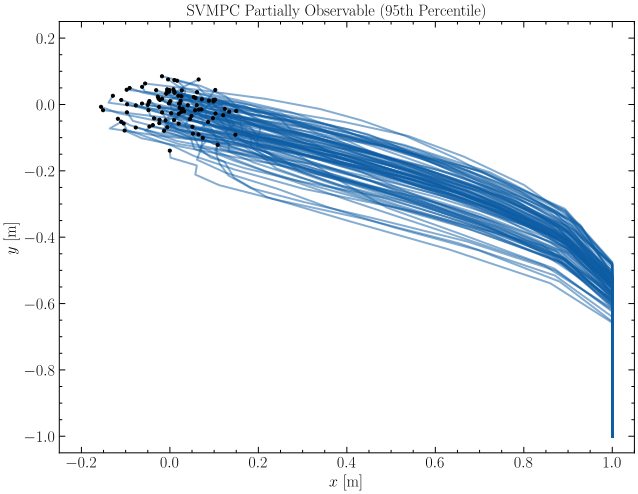

In [62]:
plt.figure()
color = next(plt.gca()._get_lines.prop_cycler)['color']
plt.plot(svmpc_states[0, :, :, -3], svmpc_states[1, :, :, -3], c=color, alpha=0.5)
plt.scatter(svmpc_states[0, -1, :, -3], svmpc_states[1, -1, :, -3], c='k', zorder=3, s=10)
plt.xlim([-0.25, 1.05])
plt.ylim([-1.05, 0.25])
plt.title('SVMPC Partially Observable (95th Percentile)')
plt.xlabel('$x\ [\mathrm{m}]$')
plt.ylabel('$y\ [\mathrm{m}]$')

plt.gca().set_position([0, 0, 1, 1])
plt.gcf().patch.set_alpha(1)
plt.savefig('figures/svmpc-partial-trajs.svg')
plt.savefig('figures/svmpc-partial-trajs.png')

In [14]:
np.log(inv_temps[-2])

6.0